# Server

* login

```sh
$ ssh -i seoul_aws.pem ubuntu@vipthechlab
```
    
## Setup and configuration
* Clients - Web Proxy Server - Web Server Gateway Interface(WSGI) - Python Web Application Server

* Web Proxy Server: Nginx
* WSGI Application Server(?): Gunicorn
* Python Web Application Server: Django

### Web Proxy server
* Apache vs Nginx
  * https://www.digitalocean.com/community/tutorials/apache-vs-nginx-practical-considerations
  * http://knot.tistory.com/88
 

 
### Web Server Gateway Interface
* The Web Server Gateway Interface (WSGI) is a specification for simple and universal interface between web servers and web applications or frameworks for the ***Python programming language***.
* Web Server Gateway Interface
  * https://en.wikipedia.org/wiki/Web_Server_Gateway_Interface
* App Servers for django
  * https://www.digitalocean.com/community/tutorials/django-server-comparison-the-development-server-mod_wsgi-uwsgi-and-gunicorn
* gunicorn VS uwsgi
  * http://devspark.tistory.com/entry/gunicorn-vs-uwsgi
  
  

### Postgres Setup

```shell
$ sudo -u postgres psql
[sudo] password for rofox: 
psql (9.5.6)
Type "help" for help. 
  
postgres=# CREATE DATABASE viptechbot;
CREATE DATABASE
postgres=# CREATE USER viptech WITH PASSWORD 'viptechpw';
CREATE ROLE
postgres=# ALTER ROLE viptech SET client_encoding TO 'utf8';
ALTER ROLE
postgres=# ALTER ROLE viptech SET default_transaction_isolation TO 'read committed';
ALTER ROLE
postgres=# ALTER ROLE viptech SET timezone TO 'UTC';
ALTER ROLE
postgres=# GRANT ALL PRIVILEGES ON DATABASE viptechbot TO viptech;
GRANT
postgres=# \q

```

### Django Setup
* Postgresql + django + gunicorn + nginx
  * https://www.digitalocean.com/community/tutorials/how-to-set-up-django-with-postgres-nginx-and-gunicorn-on-ubuntu-16-04
* log for nginx
```sh
$sudo tail -n 20 /var/log/nginx/error.log
```
#### After modifying Django setup rerun "sudo systemctl restart gunicorn  

### AWS Setups

#### IP
* Elastic IPs
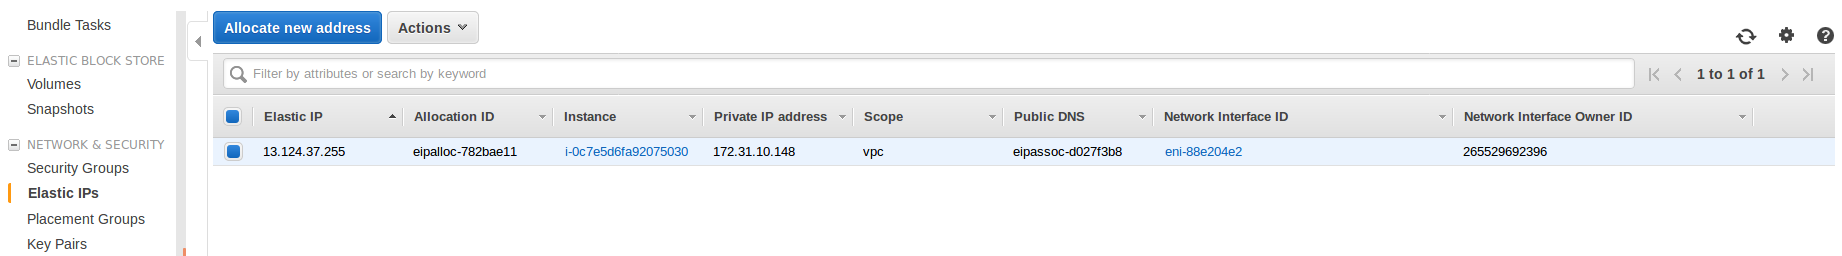

#### Domain
* Domain
  * Domain Setup
    * https://console.aws.amazon.com/route53/
  * Manuals
    * https://aws.amazon.com/ko/getting-started/tutorials/get-a-domain/
* References
  * AWS Korean Manuals
    * https://opentutorials.org/course/608/3005
  * AWS Domains
    * https://aws.amazon.com/ko/getting-started/tutorials/get-a-domain/

* Setup "third domain" and "second domain" as below:
  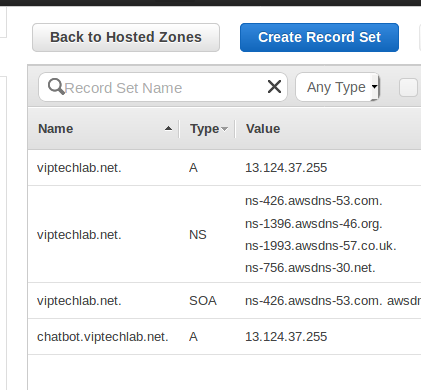

#### HTTPS Setup

* gunicorn + nginx setup for https
> This option sets the length of time that the certificate will be considered valid. We set it for one year here.

  * https://www.digitalocean.com/community/tutorials/how-to-create-a-self-signed-ssl-certificate-for-nginx-in-ubuntu-16-04
  * https://www.digitalocean.com/community/questions/how-to-run-https-supported-django-application-in-gunicorn-nginx


* We convert the nginx setup '/etc/nginx/sites-availble/viptechbot' as follows
```shell
server {
    listen 80;
    server_name chatbot.viptechlab.net;
    listen 443 ssl;                      # added
    listen [::]:443 ssl;                 # added
 
    include snippets/self-signed.conf;   # added
    include snippets/ssl-params.conf;    # added
 
    location = /favicon.ico { access_log off; log_not_found off; }
    location /static/ {
        root /home/rofox/work/viptechbot;
    }

    location / {
        include proxy_params;
        proxy_pass http://unix:/home/rofox/work/viptechbot/viptechbot.sock;
    }
}
```
* default setup and viptechbot setup
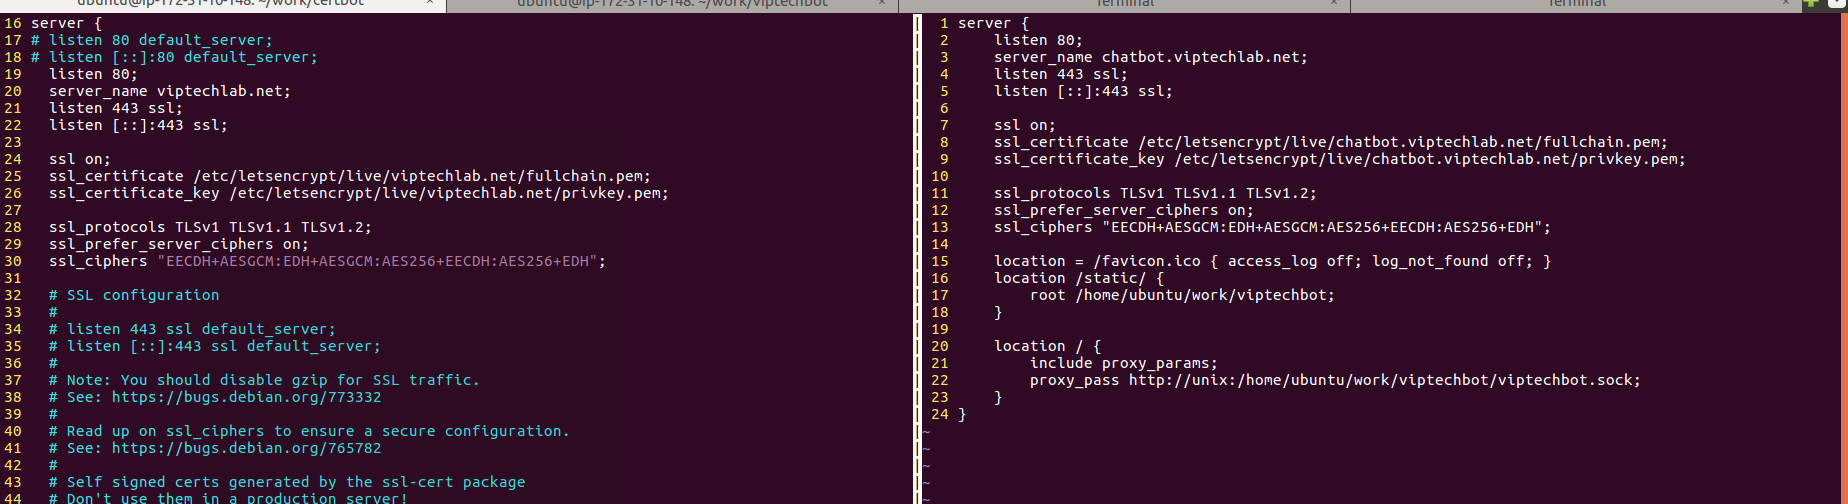

* SSL?
  * SSL Certification
    * http://minix.tistory.com/395
    * http://minix.tistory.com/397
* How to get Certification for Nginx (한글)
  * Let's encrypt SSL and Nginx
    * http://blog.naver.com/openglx2/220651138510
    * Let's encrypt Tool:
      * https://github.com/certbot/certbot
  * Misc informations    
    * https://www.gogetssl.com/domain-validation/comodo-free-ssl/
    * https://opentutorials.org/course/228/4894
    * http://tech.tigiminsight.com/2015/08/18/nginx-with-ssl.html
  

# Debugging

* ??? RUN **gunicorn & django** on console, not as daemon for DEBUGGING
  * EDIT /etc/group
    * Add your id in www-data
![_auto_0](attachment:_auto_0)

* Run
```sh
$ gunicorn --workers 3 --bind unix:<path>/viptechbot.sock viptechbot.wsgi:application
$ gunicorn --workers 3 --bind unix:/home/ubuntu/work/viptechbot/viptechbot.sock viptechbot.wsgi:application --log-level DEBUG # example
```

## Deployment



# ChatBot Specifics
## Telegram
* Official Sites
  * About Telegram bots: https://core.telegram.org/bots
  * Bot API manual: https://core.telegram.org/bots/api

* Example
  * Simple implementation using python-telegram-bot library  
    * https://github.com/PsyLang/langbot
    * https://github.com/PsyLang/langbot/blob/master/ui/telegram/test_langbot_telegram.ipynb
  * Implementation using Google App Engine + Telegram API
    * http://bakyeono.net/post/2015-08-24-using-telegram-bot-api.html#2-%EB%B4%87%EC%9D%84-%EC%9C%84%ED%95%9C-%EC%84%9C%EB%B2%84-%EC%A4%80%EB%B9%84
  * django-telegram-bot
    * https://github.com/jlmadurga/django-telegram-bot
    * https://django-telegram-bot.readthedocs.io/en/latest/readme.html
    
* Webhook
  * https://github.com/python-telegram-bot/python-telegram-bot/wiki/Webhooks
* Python-telegram-bot
  * https://python-telegram-bot.org/

## Kakao
* How to setup kakao bot
  * http://humit.tistory.com/249

  
## Slack
 
* Example with GOOGLE app engine
  * https://github.com/lexifdev/marvin
  
* https://github.com/pistatium/python_slack_bot